In [ ]:
import matplotlib.image as im
import matplotlib.pyplot as plt
from scipy.linalg import eigh
import numpy as np
from PIL import Image
from sklearn.preprocessing import StandardScaler

In [ ]:
def readImage(fileName) :
  img = Image.open(fileName)
  '''
  plt.figure(figsize=(9,6))
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  '''

  imggray = img.convert('LA')
  '''
  print('Image size : ',imggray.size)
  plt.figure(figsize=(9,6))
  plt.imshow(imggray)
  plt.axis('off')
  plt.show()
  '''
  imgmat = np.array(list(imggray.getdata(band=0)), float)

#Reshape according to original image dimension 
# size[0] : width , size[1] : height

  imgmat.shape = (imggray.size[1], imggray.size[0])

  print('Image size : ',imgmat.shape)

  '''
  plt.figure(figsize=(9,6))
  plt.imshow(imgmat,cmap='gray')
  plt.axis('off')
  plt.show()
  '''
  fig,ax = plt.subplots(1,2,figsize=(15,10))
  #fig.subplots_adjust(wspace=0.1, hspace=0.1)

  ax[0].axis('off')
  ax[0].imshow(img, cmap=plt.get_cmap('gray'))
  ax[0].set_title('Original image ',fontweight="bold", size=22)

  ax[1].axis('off')
  ax[1].imshow(imggray )# cmap=plt.get_cmap('gray'))
  ax[1].set_title('Grey-Scaled Image ',fontweight="bold", size=22)


  return imgmat

In [ ]:
 class PCA :

  def __init__(self, image) : 
    self.img = image.copy();
    self.centered_img = self.img - np.mean(self.img, axis=0,keepdims=True)  
    self.eig_vals,self.eig_vec = np.linalg.eigh(np.cov(self.centered_img,rowvar = False))
    self.eig_vec_dim = np.size(self.eig_vec, axis=0)
    idx = np.argsort(self.eig_vals)
    idx = idx[::-1]

    self.eig_vec = self.eig_vec[:,idx]
    self.eig_vals = self.eig_vals[idx]

    self.explained_variance_ratio = self.eig_vals / np.sum(self.eig_vals)
    self.explained_cumulative_variance_ratio = np.cumsum(self.eig_vals) / np.sum(self.eig_vals)

  def imageCompression(self,percentage) :
    total_dim = self.img.shape[1];
    #print("Total dim : ",total_dim)
    compress_dim = int(percentage / 100 * total_dim)

    if compress_dim > 0 :
      self.eig_vec = self.eig_vec[:,range(compress_dim)]

    print("Shape of Centralised matrix : ",self.centered_img.shape)
    print("Shape of covariance matrix : ",np.cov(self.centered_img,rowvar=False).shape)
    print("Shape of Eigen matrix (" ,percentage, "% of components Retained ) : ",self.eig_vec.shape,"\n")
    #print("Shape of np.mean", np.mean(self.img,axis=1).shape)

    #score = np.dot(self.eig_vec, self.centered_img.T)
    #compressedImage = np.dot(self.eig_vec, score.T) + np.mean(self.img, axis=0,keepdims=True)
    score = np.dot(self.centered_img,self.eig_vec)
    compressedImage = np.dot(score, self.eig_vec.T) + np.mean(self.img,axis=0)
    return compressedImage

  def plot_explained_variance_ratio(self) :
    fig, axes = plt.subplots(1,1,figsize=(12,7))
    plt.plot(self.explained_variance_ratio[:100] * 100)
    plt.title('Screegraph of Variance Explained(%)', fontsize=20)
    plt.ylabel('variance explained(%)',fontsize=16)
    plt.xlabel('Principal Components',fontsize=16)
    plt.show()

  def plot_explained_cumulative_variance_ratio(self) :
    fig, axes = plt.subplots(1,1,figsize=(12,7))
    plt.plot(self.explained_cumulative_variance_ratio[:100]*100)
    plt.title('Screegraph Cumulative Variance Explained (%)', fontsize=20)
    plt.ylabel('cumulative var explained(%)',fontsize=20)
    plt.xlabel('Number of Principal Components',fontsize=20)
    plt.show()   


Image size :  (1600, 1195)


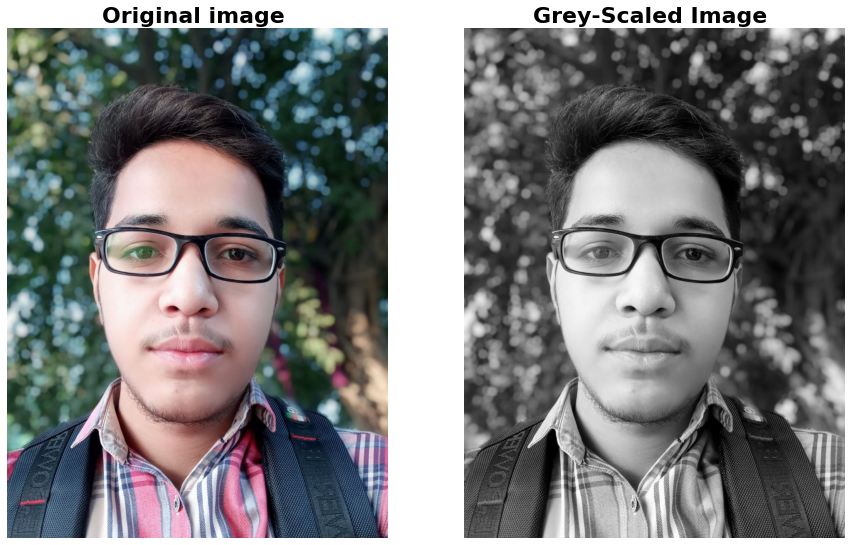

In [ ]:
image = readImage('Photo2.jpeg')
#plt.imshow(image,cmap='gray')
#plt.axis('off')
#plt.show()

In [ ]:
pca1 = PCA(image)
pca2 = PCA(image)
pca3 = PCA(image)
pca4 = PCA(image)
pca5 = PCA(image)
pca6 = PCA(image)
pca7 = PCA(image)

Shape of Centralised matrix :  (1600, 1195)
Shape of covariance matrix :  (1195, 1195)
Shape of Eigen matrix ( 1 % of components Retained ) :  (1195, 11) 

Shape of Centralised matrix :  (1600, 1195)
Shape of covariance matrix :  (1195, 1195)
Shape of Eigen matrix ( 3 % of components Retained ) :  (1195, 35) 

Shape of Centralised matrix :  (1600, 1195)
Shape of covariance matrix :  (1195, 1195)
Shape of Eigen matrix ( 5 % of components Retained ) :  (1195, 59) 

Shape of Centralised matrix :  (1600, 1195)
Shape of covariance matrix :  (1195, 1195)
Shape of Eigen matrix ( 10 % of components Retained ) :  (1195, 119) 

Shape of Centralised matrix :  (1600, 1195)
Shape of covariance matrix :  (1195, 1195)
Shape of Eigen matrix ( 20 % of components Retained ) :  (1195, 239) 

Shape of Centralised matrix :  (1600, 1195)
Shape of covariance matrix :  (1195, 1195)
Shape of Eigen matrix ( 30 % of components Retained ) :  (1195, 358) 

Shape of Centralised matrix :  (1600, 1195)
Shape of covar

Text(0.5, 1.0, '1% Components')

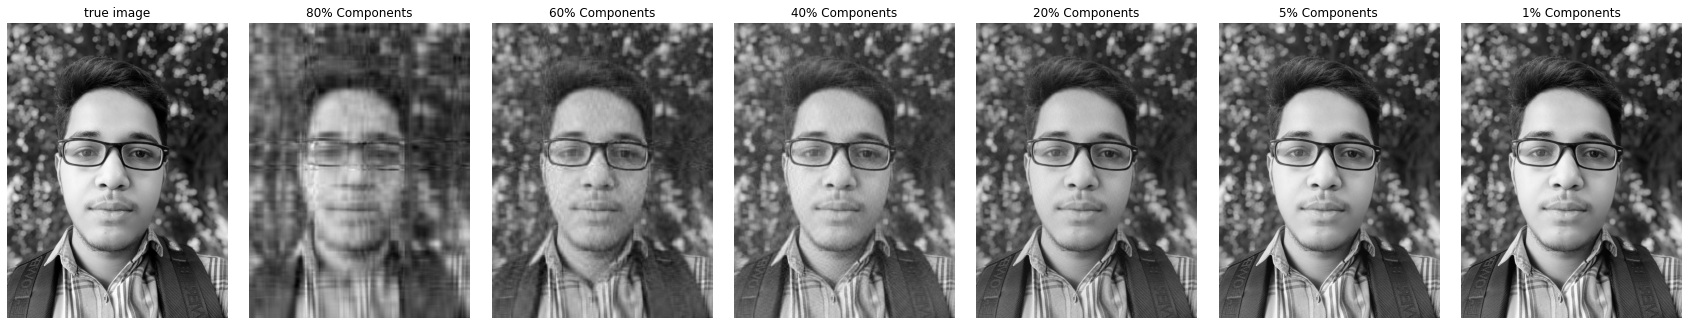

In [ ]:
Img1 = pca1.imageCompression(1)
Img2 = pca2.imageCompression(3)
Img3 = pca3.imageCompression(5)
Img4 = pca4.imageCompression(10)
Img5 = pca5.imageCompression(20)
Img6 = pca6.imageCompression(30)
Img7 = pca7.imageCompression(40)
fig,ax = plt.subplots(1,7,figsize=(30,10))
fig.subplots_adjust(wspace=0.1, hspace=0.1)

ax[0].axis('off')
ax[0].imshow(image, cmap=plt.get_cmap('gray'))
ax[0].set_title('true image')

ax[1].axis('off')
ax[1].imshow(Img1 , cmap=plt.get_cmap('gray'))
ax[1].set_title('80% Components')

ax[2].axis('off')
ax[2].imshow(Img2 , cmap=plt.get_cmap('gray'))
ax[2].set_title('60% Components')

ax[3].axis('off')
ax[3].imshow(Img3 , cmap=plt.get_cmap('gray'))
ax[3].set_title('40% Components')

ax[4].axis('off')
ax[4].imshow(Img4 , cmap=plt.get_cmap('gray'))
ax[4].set_title('20% Components')

ax[5].axis('off')
ax[5].imshow(Img5 , cmap=plt.get_cmap('gray'))
ax[5].set_title('5% Components')

ax[6].axis('off')
ax[6].imshow(Img6 , cmap=plt.get_cmap('gray'))
ax[6].set_title('1% Components')

Text(0.5, 1.0, 'Retaining 1% components ')

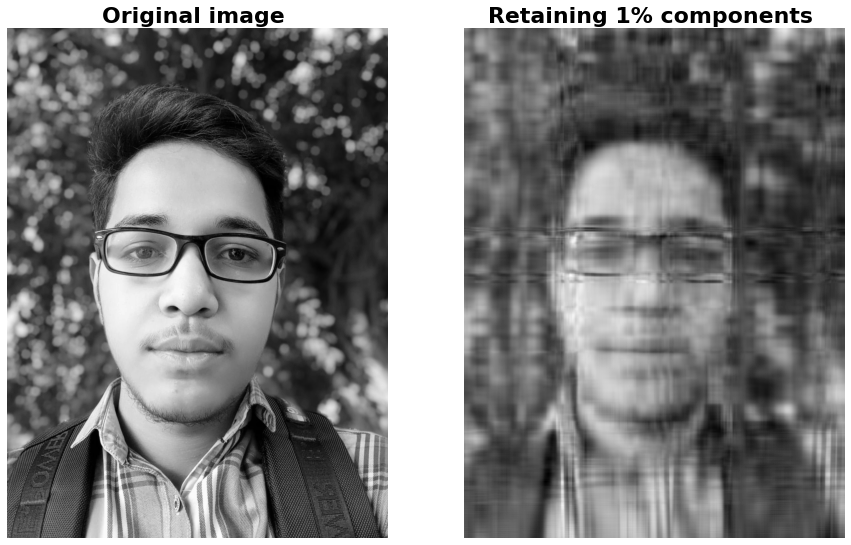

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,10))
  #fig.subplots_adjust(wspace=0.1, hspace=0.1)

ax[0].axis('off')
ax[0].imshow(image, cmap=plt.get_cmap('gray'))
ax[0].set_title('Original image ',fontweight="bold", size=22)

ax[1].axis('off')
ax[1].imshow(Img1 , cmap=plt.get_cmap('gray'))
ax[1].set_title('Retaining 1% components ',fontweight="bold", size=22)

Text(0.5, 1.0, 'Retaining 3% components ')

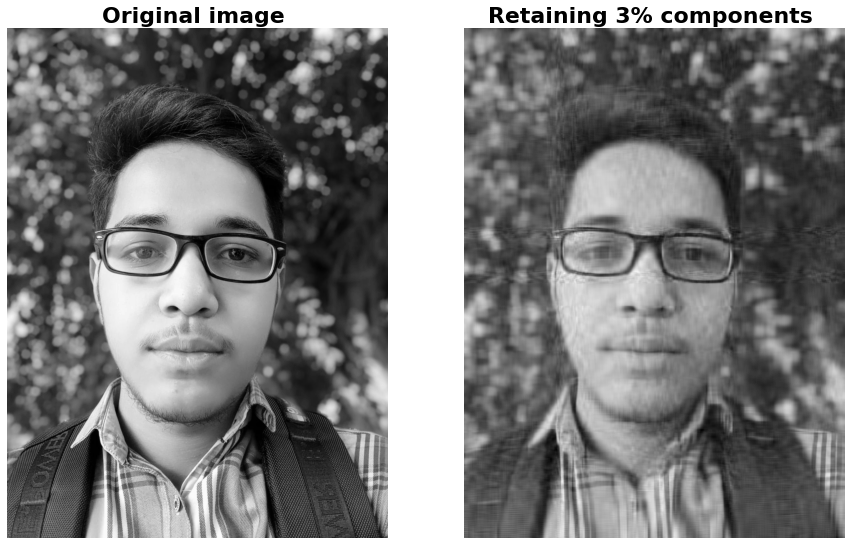

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,10))
  #fig.subplots_adjust(wspace=0.1, hspace=0.1)

ax[0].axis('off')
ax[0].imshow(image, cmap=plt.get_cmap('gray'))
ax[0].set_title('Original image ',fontweight="bold", size=22)

ax[1].axis('off')
ax[1].imshow(Img2 , cmap=plt.get_cmap('gray'))
ax[1].set_title('Retaining 3% components ',fontweight="bold", size=22)

Text(0.5, 1.0, 'Retaining 5% components ')

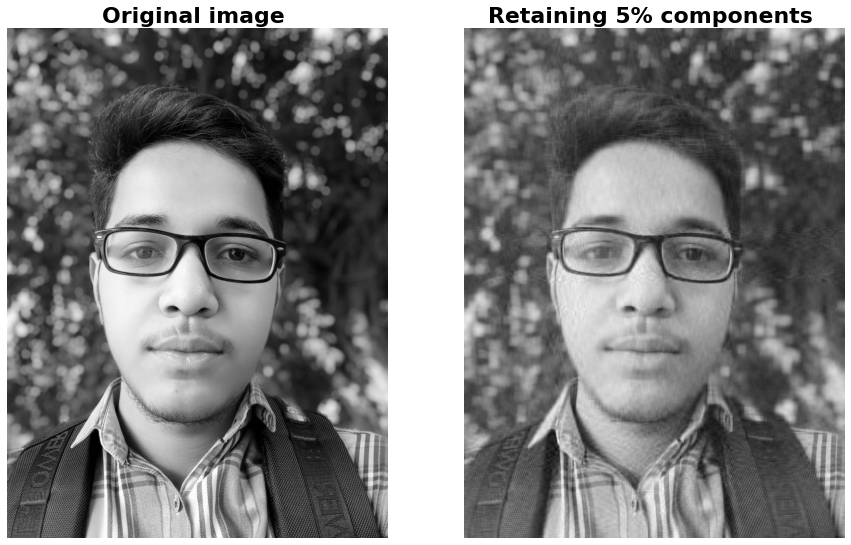

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,10))
  #fig.subplots_adjust(wspace=0.1, hspace=0.1)

ax[0].axis('off')
ax[0].imshow(image, cmap=plt.get_cmap('gray'))
ax[0].set_title('Original image ',fontweight="bold", size=22)

ax[1].axis('off')
ax[1].imshow(Img3 , cmap=plt.get_cmap('gray'))
ax[1].set_title('Retaining 5% components ',fontweight="bold", size=22)

Text(0.5, 1.0, 'Retaining 10% components ')

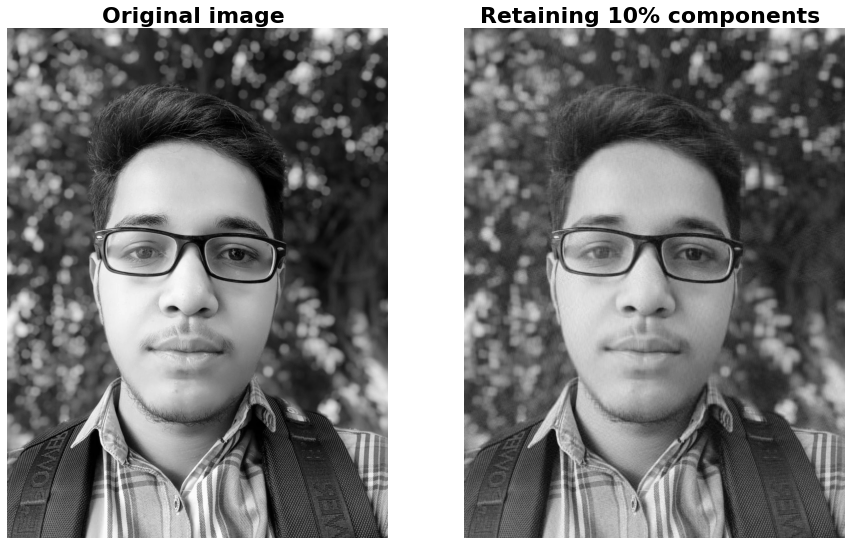

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,10))
  #fig.subplots_adjust(wspace=0.1, hspace=0.1)

ax[0].axis('off')
ax[0].imshow(image, cmap=plt.get_cmap('gray'))
ax[0].set_title('Original image ',fontweight="bold", size=22)

ax[1].axis('off')
ax[1].imshow(Img4 , cmap=plt.get_cmap('gray'))
ax[1].set_title('Retaining 10% components ',fontweight="bold", size=22)

Text(0.5, 1.0, 'Retaining 20% components ')

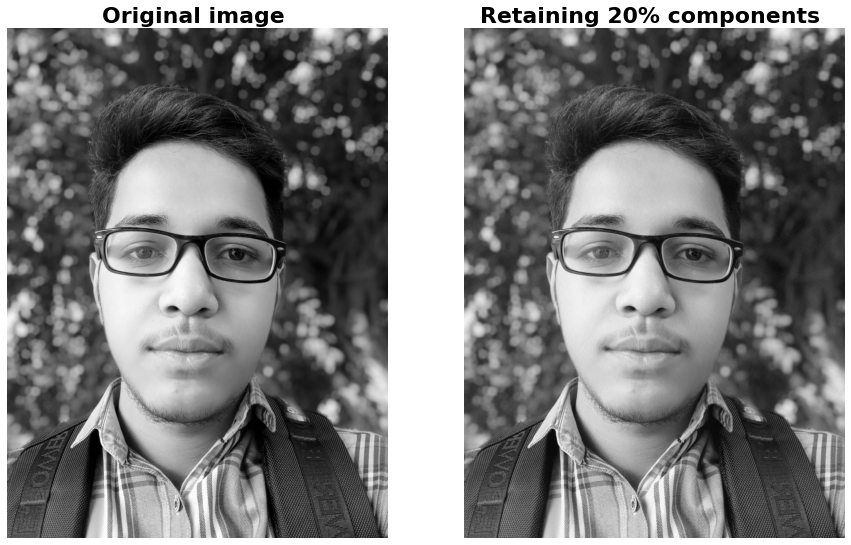

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,10))
  #fig.subplots_adjust(wspace=0.1, hspace=0.1)

ax[0].axis('off')
ax[0].imshow(image, cmap=plt.get_cmap('gray'))
ax[0].set_title('Original image ',fontweight="bold", size=22)

ax[1].axis('off')
ax[1].imshow(Img5 , cmap=plt.get_cmap('gray'))
ax[1].set_title('Retaining 20% components ',fontweight="bold", size=22)

Text(0.5, 1.0, 'Retaining 30% components ')

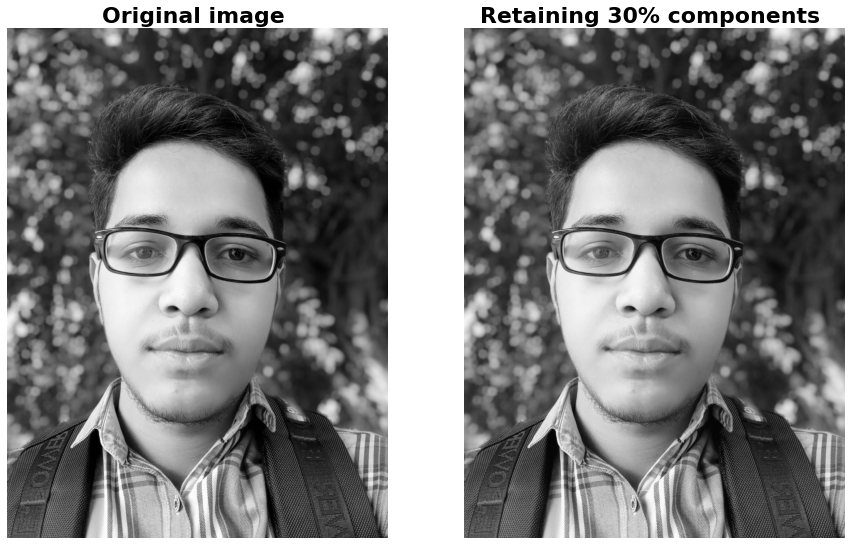

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,10))
  #fig.subplots_adjust(wspace=0.1, hspace=0.1)

ax[0].axis('off')
ax[0].imshow(image, cmap=plt.get_cmap('gray'))
ax[0].set_title('Original image ',fontweight="bold", size=22)

ax[1].axis('off')
ax[1].imshow(Img6 , cmap=plt.get_cmap('gray'))
ax[1].set_title('Retaining 30% components ',fontweight="bold", size=22)

Text(0.5, 1.0, 'Retaining 40% components ')

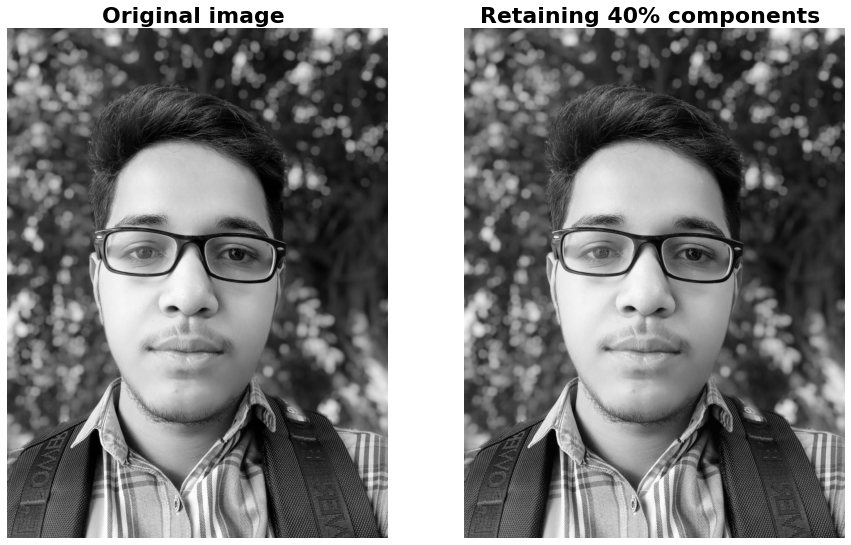

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,10))
  #fig.subplots_adjust(wspace=0.1, hspace=0.1)

ax[0].axis('off')
ax[0].imshow(image, cmap=plt.get_cmap('gray'))
ax[0].set_title('Original image ',fontweight="bold", size=22)

ax[1].axis('off')
ax[1].imshow(Img7 , cmap=plt.get_cmap('gray'))
ax[1].set_title('Retaining 40% components ',fontweight="bold", size=22)

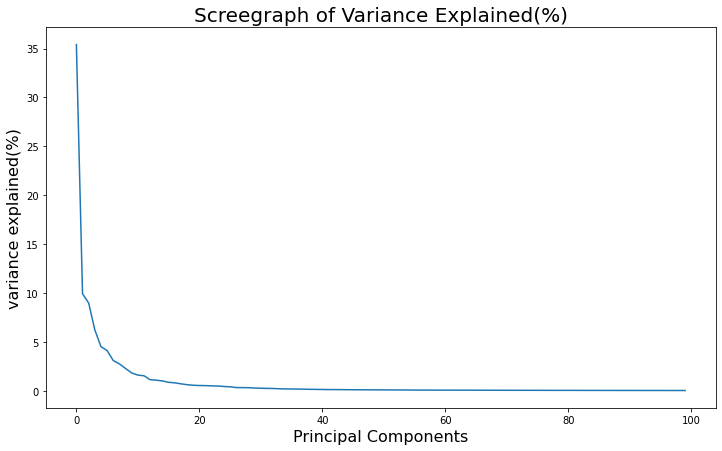

In [ ]:
pca1.plot_explained_variance_ratio()

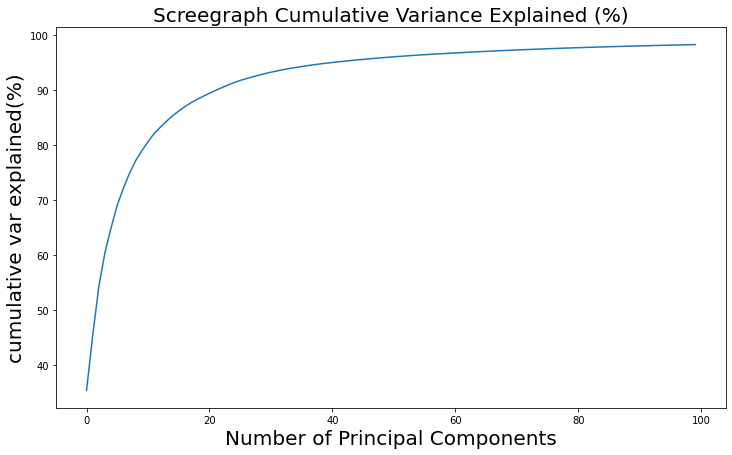

In [ ]:
pca1.plot_explained_cumulative_variance_ratio()